### Clustering 2D points

From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

You are given the array points from the previous exercise, and also an array new_points.

In [45]:
# import numpy as np
# points = np.array([[1, 1], [1.5, 1.5], [0.5, 0.5], [10,10], [10.5,10.5], [10,10.5],  [20,20], [20.5,20.5], [20,20.5]])
# new_points =  np.array([[0.5, 1],[9,9], [21,22]])

In [8]:
import numpy as np

# Define central value
central_value1 = np.array([1, 1])
central_value2 = np.array([10, 10])
central_value3 = np.array([20, 20])

# Define the number of points
num_points = 300

# Define the standard deviation for generating random points around the central value
std_dev = 1.0

# Generate random points around the central value (upon wich the model will be built)
random_points1 = np.random.normal(loc=central_value1, scale=std_dev, size=(num_points, 2))
random_points2 = np.random.normal(loc=central_value2, scale=std_dev, size=(num_points, 2))
random_points3 = np.random.normal(loc=central_value3, scale=std_dev, size=(num_points, 2))
points = np.concatenate((random_points1, random_points2, random_points3), axis=0)


# Generate random points around the central value (for prediction/clustering)
num_points2=30
random_points1 = np.random.normal(loc=central_value1, scale=std_dev, size=(num_points2, 2))
random_points2 = np.random.normal(loc=central_value2, scale=std_dev, size=(num_points2, 2))
random_points3 = np.random.normal(loc=central_value3, scale=std_dev, size=(num_points2, 2))
new_points = np.concatenate((random_points1, random_points2, random_points3), axis=0)


#new_points =  np.array([[0.5, 1],[9,9], [21,22]])
    
#print("Random Points around central value:")
#print(points)


In [9]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Inspect your clustering

Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so new_points is an array of points and labels is the array of their cluster labels.

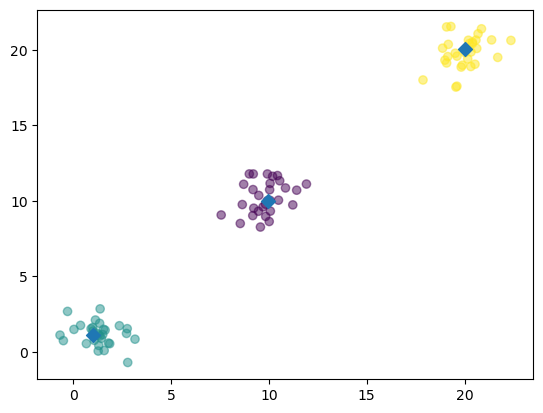

In [10]:
# Import pyplot
from matplotlib import pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs, ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()


### How many clusters of grain?

In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

This dataset was sourced from the UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/236/seeds

C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: K

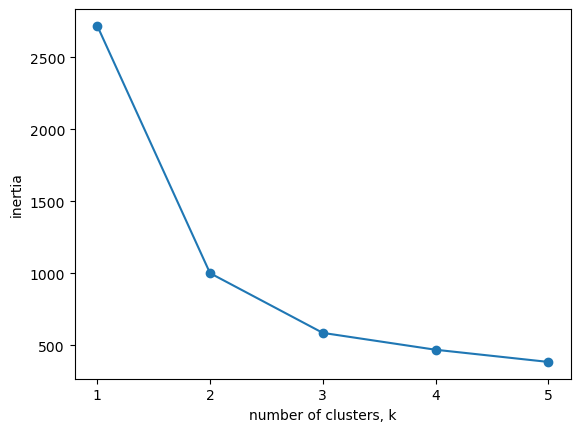

In [12]:
import pandas as pd
samples = pd.read_csv('..\\datasets\\Grains\\seeds.csv', delimiter=',')

#seeds.csv already hold the label of each grain as last colums
# let's drop it so that the model try to guess it
varieties = samples[samples.columns[-1]]
samples = samples.drop(samples.columns[-1],axis=1)

ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    # Inertia measures clustering quality,
    # Measures how spread out the clusters are (lower is better)
    # Distance from each sample to centroid of its cluster
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# you observed from the inertia plot that 3 is a good number of clusters for the grain data

### Evaluating the grain clustering

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

In [13]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with clusters and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

# You'll notice that most varity 1 is labeled 2, and most vaiety 2 is label 1, and variety 3 labled 0, which kind of good clustering

C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


varieties   1   2   3
labels               
0           1  60   0
1           9   0  68
2          59  10   2


###  Scaling fish data for clustering

You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

These fish measurement data were sourced from the Journal of Statistics Education.

In [15]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

### Clustering the fish data

You'll now use your standardization and clustering pipeline from the previous exercise to cluster the fish by their measurements, and then create a cross-tabulation to compare the cluster labels with the fish species.

As before, samples is the 2D array of fish measurements. Your pipeline is available as pipeline, and the species of every fish sample is given by the list species

In [17]:
# Import pandas
import pandas as pd
samples = pd.read_csv('..\\datasets\\fish.csv', delimiter=',')

#fish.csv already hold the label of each fish as last colums
# let's drop it so that the model try to guess it
species = samples[samples.columns[0]]
samples = samples.drop(samples.columns[0],axis=1)

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0            0     0     19      1
1           33     0      1      0
2            0    17      0      0
3            0     0      0     13


C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Clustering stocks using KMeans

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

KMeans and make_pipeline have already been imported for you.

In [18]:
# Import Normalizer
from sklearn.preprocessing import Normalizer
movements = pd.read_csv('..\\datasets\\company-stock-movements-2010-2015-incl.csv', delimiter=',')

#the csv already hold the label of each fish as last colums
# let's drop it so that the model try to guess it
companies = movements[movements.columns[0]]
movements = movements.drop(movements.columns[0],axis=1)

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)


C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\msentissi\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

### Which stocks move together?

In the previous exercise, you clustered companies by their daily stock price movements. So which company have stock prices that tend to change in the same way? You'll now inspect the cluster labels from your clustering to find out.

Your solution to the previous exercise has already been run. Recall that you constructed a Pipeline pipeline containing a KMeans model and fit it to the NumPy array movements of daily stock movements. In addition, a list companies of the company names is available.

In [19]:
# Import pandas
import pandas as pd

# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))


    labels                           companies
10       0                      ConocoPhillips
44       0                        Schlumberger
46       0                      Sanofi-Aventis
35       0                            Navistar
49       0                               Total
42       0                   Royal Dutch Shell
12       0                             Chevron
19       0                     GlaxoSmithKline
37       0                            Novartis
43       0                                 SAP
52       0                            Unilever
6        0            British American Tobacco
53       0                       Valero Energy
57       0                               Exxon
5        1                     Bank of America
55       1                         Wells Fargo
1        1                                 AIG
18       1                       Goldman Sachs
26       1                      JPMorgan Chase
15       1                                Ford
24       2   